In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

In [2]:
class Ant():
    def __init__(self, distance, alpha=1, beta=1):
        self.distance = distance
        self.cur_place = 0
        self.visited = [0]
        self.places_list = range(len(distance))
        self.alpha = alpha
        self.beta = beta

    def traverse(self, info_map):
        for i in range(len(self.distance) - 1):
            self.step(info_map)
    def step(self, info_map): 
        next_place = self.pick_move(info_map[self.cur_place], self.distance[self.cur_place])
        info_map[self.cur_place, next_place] += 1.0 / self.distance[self.cur_place, next_place]  
        self.cur_place = next_place
        self.visited.append(next_place)

    def pick_move(self, info_vector, distance_vector):
        info_vector_copy = np.copy(info_vector)
        info_vector_copy[self.visited] = 0
        goodness_vector = info_vector_copy ** self.alpha * ((1.0 / distance_vector) ** self.beta)
        normalized = goodness_vector / goodness_vector.sum()
        #print(normalized)
        next_place = np.random.choice(self.places_list, p=normalized)
        return next_place

    def pick_move_best(self, info_vector, distance_vector):
        info_vector_copy = np.copy(info_vector)
        info_vector_copy[self.visited] = 0
        goodness_vector = info_vector_copy ** self.alpha * ((1.0 / distance_vector) ** self.beta)

        #print(normalized)
        next_place = goodness_vector.argmax()
        return next_place

class AntColonyOptimization():
    def __init__(self, distance, num_ants, decay_rate, beta):
        self.distance = distance
        self.info_map = np.ones_like(self.distance)/len(distance)
        self.best_route = []
        self.best_route_distance = 0
        self.num_ants = num_ants
        self.decay_rate = decay_rate
        self.beta = beta

    def iteration(self, n, print_step, length_list):
        for i in range(n):
            for ant_i in range(num_ants):
                ant = Ant(self.distance, beta=self.beta)
                ant.traverse(self.info_map)
            if i%print_step ==0:
                self.find_best()
                length_list.append(self.best_route_distance)
            self.info_map *= self.decay_rate
            # 每次迭代结束之后，都找到最优的路径，并更新此路径长度
        
    def find_best(self):
        self.best_route, self.best_route_distance = [], 0
        ant = Ant(self.distance)
        self.best_route.append(ant.cur_place)
        for i in range(len(self.distance) - 1):
            next_place = ant.pick_move_best(self.info_map[ant.cur_place], self.distance[ant.cur_place])
            self.best_route.append(next_place)
            self.best_route_distance += self.distance[ant.cur_place, next_place]
            ant.cur_place = next_place
            ant.visited.append(next_place)

In [3]:
np.random.seed(6)
print(np.random.random())
num_places = 20
num_ants_list = [1]
decay_rate_list = [0.2, 0.4, 0.6, 0.8, 0.95]
num_iter = 100
beta_list = [0.2, 0.4, 0.7, 1.2, 1.8]
print_step = 10
start = time.process_time()
num_combinations = len(num_ants_list) * len(decay_rate_list) * len(beta_list)
dict = {}
#咱们是训练到了5蚂蚁，0.8的衰减率，0.2的beta即路径长度的重要性

rounds = 0
for num_ants in num_ants_list:
    for decay_rate in decay_rate_list:
        for beta in beta_list:
            length_list = []
            distance = np.random.randint(1, 6, size=(num_places, num_places)).astype(float)
            distance += distance.T
            for i in range(num_places):
                distance[i, i] = np.inf
            #print(distance)
            aco = AntColonyOptimization(distance, num_ants, decay_rate, beta)
            aco.iteration(num_iter, print_step, length_list)
            #print(aco.best_route, aco.best_route_distance)
            dict[num_ants, decay_rate, beta] = length_list
            rounds += 1
            end = time.process_time()
            print('process_time:{:.3f}s'.format(end-start), rounds, '/', num_combinations)
#print(str(dict))

0.8928601514360016
process_time:0.078s 1 / 25
process_time:0.141s 2 / 25
process_time:0.219s 3 / 25
process_time:0.297s 4 / 25
process_time:0.359s 5 / 25
process_time:0.422s 6 / 25
process_time:0.500s 7 / 25
process_time:0.594s 8 / 25
process_time:0.656s 9 / 25
process_time:0.734s 10 / 25
process_time:0.812s 11 / 25
process_time:0.906s 12 / 25
process_time:0.984s 13 / 25
process_time:1.047s 14 / 25
process_time:1.141s 15 / 25
process_time:1.203s 16 / 25
process_time:1.281s 17 / 25
process_time:1.359s 18 / 25
process_time:1.422s 19 / 25
process_time:1.500s 20 / 25
process_time:1.562s 21 / 25
process_time:1.641s 22 / 25
process_time:1.719s 23 / 25
process_time:1.781s 24 / 25
process_time:1.859s 25 / 25


[101.0, 100.0, 80.0, 94.0, 71.0, 91.0, 104.0, 93.0, 88.0, 75.0, 102.0, 79.0, 93.0, 90.0, 69.0, 87.0, 85.0, 62.0, 67.0, 70.0, 64.0, 75.0, 69.0, 68.0, 74.0] 25


Text(0.5, 0, 'length')

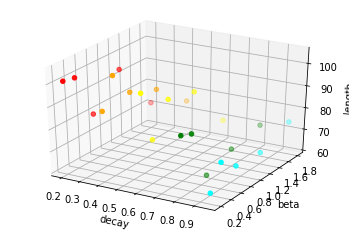

In [4]:
#拿出最终的结果，并画出三维图像
final_list = []
for value in dict.values():
    final_list.append(value[-1])
#del final_list[-1]
print(final_list, len(final_list))

#为了对应好横纵坐标，我们需要扩充一下
decay_1 = []
for i in decay_rate_list:
    for j in range(5):
        decay_1.append(i)
#print(decay_1)
beta_1 = beta_list *5

colors = ['red', 'orange', 'yellow', 'green','cyan']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(5):
    ax.scatter(decay_1[i*5:i*5+5], beta_1[i*5:i*5+5], final_list[i*5:i*5+5], c=colors[i])
ax.set_xlabel('decay')
ax.set_ylabel('beta')
ax.set_zlabel('length')
#plt.show()

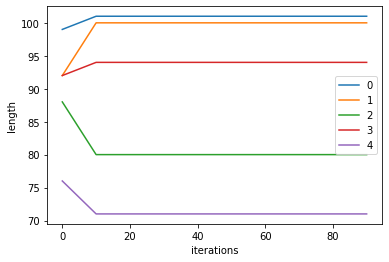

In [5]:
start_combination = 0
end_combination = 5
for i in range(start_combination, end_combination):
    plt.plot(range(0, 100, 10), list(dict.values())[i], label='{}'.format(i))
plt.xlabel('iterations')
plt.ylabel('length')
plt.legend()

In [6]:


'''
用暴力方式来解决，怎么用面向对象的方式解决呢？我们认为，这个对象自身有属性distance，有当前的路径，有
最好的路径，最短的长度
方法有：根据当前的路径返回下一个路径；run就直接是循环了；根据路径返回距离
'''
class TSP_bruteforce():
    def __init__(self, distance):
        self.distance = distance
        self.num_cities = len(distance) - 1#这里仅记录需要选择的城市数量，去掉了出发点
        self.cur_path = list(range(1, self.num_cities+1))
        self.best_path = self.cur_path
        self.best_length = self.calculate_length(self.best_path)

    def calculate_length(self, path):
        length = 0
        length += self.distance[0, path[0]]
        for i in range(self.num_cities-1):
            length += self.distance[path[i], path[i+1]]
        return length

    # 这里如果当前的是最后一个位置，那么就返回None，而run里判断循环终止也是看这里的返回值
    # 第一，找到最后一个前小于后的数，再找最后一个大与那个前数，交换，然后后面倒序
    def find_next(self):
        next_path = self.cur_path
        for i in range(len(next_path)-1, -1, -1):
            if i == 0:
                return None
            if next_path[i-1] < next_path[i]:
                left = i - 1
                break
        for j in range(len(next_path)-1, left, -1):
            if next_path[j] > next_path[left]:
                right = j
                break
        temp = next_path[left]
        next_path[left] = next_path[right]
        next_path[right] = temp
        swaped = []
        for k in range(len(next_path)-1, left, -1):
            swaped.append(next_path[k])
        for k in range(left+1, len(next_path)):
            next_path[k] = swaped[k-left-1]
        return next_path
    
    def run(self):
        while True:
            self.cur_path = self.find_next()
            if self.cur_path is None:
                break
            next_length = self.calculate_length(self.cur_path)
            if next_length < self.best_length:
                self.best_length = next_length
                self.best_path = self.cur_path
                print('改进！', self.cur_path, next_length)

In [7]:
np.random.seed(6)
print(np.random.random())
num_places = 10

start = time.process_time()


distance = np.random.randint(1, 6, size=(num_places, num_places)).astype(float)
distance += distance.T
for i in range(num_places):
    distance[i, i] = np.inf

a = TSP_bruteforce(distance)
a.run()
print(distance)
end = time.process_time()

print('process_time:{:.3f}s'.format(end-start), 'for {} cities'.format(num_places))

0.8928601514360016
改进！ [1, 2, 3, 4, 5, 7, 6, 8, 9] 56.0
改进！ [1, 2, 3, 5, 4, 6, 7, 8, 9] 55.0
改进！ [1, 2, 3, 6, 4, 5, 7, 8, 9] 53.0
改进！ [1, 2, 4, 5, 3, 6, 7, 8, 9] 52.0
改进！ [1, 2, 4, 5, 7, 6, 3, 8, 9] 51.0
改进！ [1, 2, 6, 3, 4, 5, 7, 8, 9] 49.0
改进！ [1, 2, 6, 3, 7, 5, 4, 8, 9] 48.0
改进！ [1, 3, 6, 2, 4, 5, 7, 8, 9] 47.0
改进！ [1, 8, 7, 3, 6, 2, 4, 5, 9] 46.0
改进！ [2, 6, 3, 4, 5, 7, 8, 1, 9] 45.0
改进！ [2, 6, 3, 7, 5, 4, 8, 1, 9] 44.0
改进！ [5, 4, 2, 6, 3, 7, 8, 1, 9] 43.0
[[inf  7.  6.  8.  5.  5.  6.  7.  4.  6.]
 [ 7. inf  7.  7.  5.  7.  7.  7.  5.  6.]
 [ 6.  7. inf  8.  4. 10.  3.  8.  8.  8.]
 [ 8.  7.  8. inf  6.  7.  6.  6.  6.  8.]
 [ 5.  5.  4.  6. inf  3.  5.  7.  4.  6.]
 [ 5.  7. 10.  7.  3. inf  8.  5.  8.  7.]
 [ 6.  7.  3.  6.  5.  8. inf  6.  7.  8.]
 [ 7.  7.  8.  6.  7.  5.  6. inf  5. 10.]
 [ 4.  5.  8.  6.  4.  8.  7.  5. inf  7.]
 [ 6.  6.  8.  8.  6.  7.  8. 10.  7. inf]]
process_time:1.328s for 10 cities


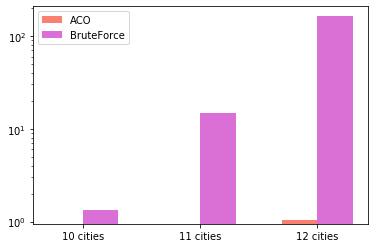

In [8]:
yscale('log')
ACO = [0.203, 0.656, 1.047]
BruteForce = [1.344, 14.688, 163.016]
x = np.arange(3)
width = 1

bar_width=0.3#设置柱状图的宽度
tick_label=['10 cities','11 cities','12 cities']

#绘制并列柱状图
plt.bar(x,ACO,bar_width,color='salmon',label='ACO')
plt.bar(x+bar_width,BruteForce,bar_width,color='orchid',label='BruteForce')

plt.legend()#显示图例，即label
plt.xticks(x+bar_width/2,tick_label)#显示x坐标轴的标签,即tick_label,调整位置，使其落在两个直方图中间位置
plt.show()